In [1]:
# importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
start = "2015-01-01"
end = "2024-01-01"
stock = "AAPL"

data = yf.download(stock, start=start, end=end, auto_adjust=False, multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [3]:
df = data.copy()
df.isnull().values.any()
df = df.dropna()

In [4]:
data

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,24.237553,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.554743,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.556953,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.887278,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.805084,27.972500,28.037500,27.174999,27.307501,237458000
...,...,...,...,...,...,...
2023-12-22,191.788757,193.600006,195.410004,192.970001,195.179993,37149600
2023-12-26,191.243912,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,191.342941,193.149994,193.500000,191.089996,192.490005,48087700


In [5]:
df2 = data["Volume"]
df2

,Volume
Date,
2015-01-02,212818400
2015-01-05,257142000
2015-01-06,263188400
2015-01-07,160423600
2015-01-08,237458000
...,...
2023-12-22,37149600
2023-12-26,28919300
2023-12-27,48087700


In [6]:
high_open = data[data["Open"] >= 80]
high_open

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-24,76.801628,79.577499,80.832497,79.379997,80.062500,146537600
2020-01-29,78.256561,81.084999,81.962502,80.345001,81.112503,216229200
2020-01-30,78.143143,80.967499,81.022499,79.687500,80.135002,126743200
2020-01-31,74.678391,77.377502,80.669998,77.072502,80.232498,199588400
2020-02-05,77.559258,80.362503,81.190002,79.737503,80.879997,118826800
...,...,...,...,...,...,...
2023-12-22,191.788757,193.600006,195.410004,192.970001,195.179993,37149600
2023-12-26,191.243912,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,191.342941,193.149994,193.500000,191.089996,192.490005,48087700


In [7]:
# importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = data.copy()
df.isnull().values.any()
df = df.dropna()

df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,24.237553,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.554743,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.556953,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.887278,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.805084,27.972500,28.037500,27.174999,27.307501,237458000


In [9]:
# 1-day lag plot

import plotly.graph_objects as go

# make a copy of the data

data = df.copy()

data["Lagged Close"] = data["Close"].shift(1)

fig = go.Figure(data=go.Scatter(x=data["Close"], y=data["Lagged Close"], mode="markers"))

fig.update_layout(
    title=f"Lag Plot of {stock} Closing Prices with a 1-Day Lag",
    xaxis_title="Todays Close",
    yaxis_title="Previous Days Close",
    template="plotly_dark"
)

fig.show()

In [10]:
# 5-day lag plot

import plotly.graph_objects as go

# make a copy of the data

data = df.copy()

data["Lagged Close"] = data["Close"].shift(5)

fig = go.Figure(data=go.Scatter(x=data["Close"], y=data["Lagged Close"], mode="markers"))

fig.update_layout(
    title=f"Lag Plot of {stock} Closing Prices with a 5-Day Lag",
    xaxis_title="Todays Close",
    yaxis_title="Previous Days Close",
    template="plotly_dark"
)

fig.show()

In [11]:
# train & testing data

train_data = df.iloc[0:int(len(data)*0.8), :]
test_data = df.iloc[int(len(data)*0.8):, :]


In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data["Open"], mode="lines", name="Training Data", line=dict(color="blue")))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data["Open"], mode="lines", name="Testing Data", line=dict(color="green")))

fig.update_layout(
    title=f"{stock} Open Prices, Training and Testing Data",
    xaxis_title="Dates",
    yaxis_title="Open Prices",
    template="plotly_dark"
)

fig.show()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

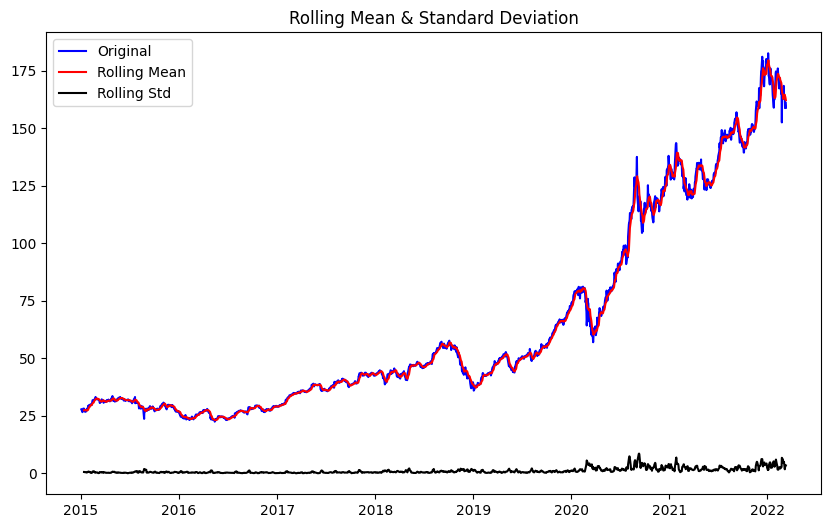

In [13]:
window = 7
train_series = train_data["Open"]

# Determining the rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

# plot rolling statistics
fig = plt.figure(figsize=(10,6))
orig = plt.plot(train_series, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")

In [14]:
from statsmodels.tsa.stattools import adfuller

window = 7
train_series = train_data['Close']

dftest = adfuller(train_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
dfoutput

,0
Test Statistic,0.607019
p-value,0.987787
#Lags Used,20.000000
Number of Observations Used,1790.000000
Critical Value (1%),-3.434008
Critical Value (5%),-2.863156
Critical Value (10%),-2.567630


In [15]:
# Calculate the difference between the consecutive elements and dropping any NaN values
train_diff = train_series.diff(periods=1)
train_diff = train_diff.dropna(inplace = False)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

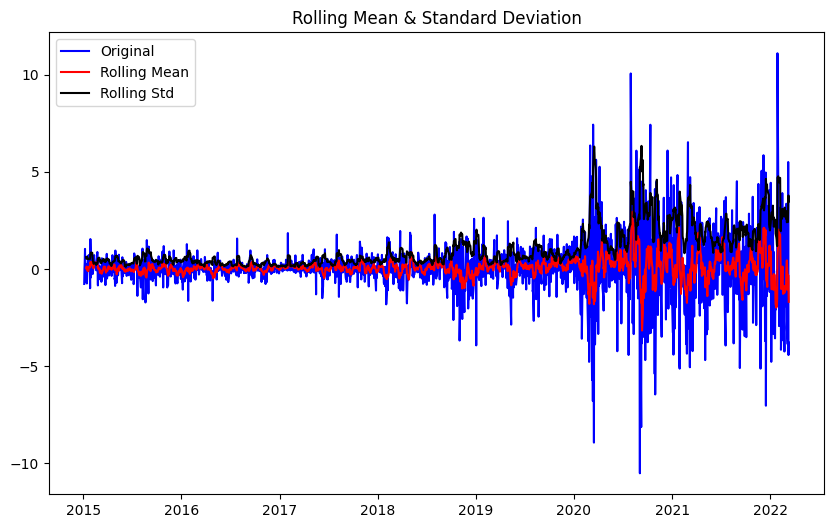

In [16]:
window = 7

# Determining the rolling statistics
rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()

# plot rolling statistics
fig = plt.figure(figsize=(10,6))
orig = plt.plot(train_diff, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")

In [17]:
dftest = adfuller(train_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
dfoutput

,0
Test Statistic,-8.898562e+00
p-value,1.188433e-14
#Lags Used,1.900000e+01
Number of Observations Used,1.790000e+03
Critical Value (1%),-3.434008e+00
Critical Value (5%),-2.863156e+00
Critical Value (10%),-2.567630e+00


In [18]:
def smape_kun(y_true, y_pred, epsilon=1e-8):
  # Calculate the denominator to avoid division by zero
  denominator = (np.abs(y_pred) + np.abs(y_true)) + epsilon

  # Compute the absolute percentage error with symmetric scaling
  absolute_percentage_error = np.abs(y_pred - y_true) * 200 / denominator

  # Calculate the mean of the symmetric absolute percentage errors
  mean_smape = np.mean(absolute_percentage_error)

  return mean_smape

In [19]:
test_series = test_data["Close"]
test_diff = test_series.diff(periods=1)
test_diff = test_diff.dropna(inplace = False)

Modelling

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# initialize the history with our training data
history = [x for x in train_diff]
predictions = list()

# iterate through the test data points
for t in range(len(test_diff)):
    p, d, q = 5, 1, 0
    model = ARIMA(history, order=[p, d, q])
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    obs = test_diff[t]
    history.append(obs)

    if t % 100 == 0:
      print('Test Series Point: {}\tPredicted={}. Expected={}'.format(t, yhat, obs))

  # Calculate MSE to determine if model performed well

mse = mean_squared_error(test_diff, predictions)
print("Mean Squared Error (MSE): ", mse)

Test Series Point: 0	Predicted=-2.1278821390077596. Expected=4.470001220703125
Test Series Point: 100	Predicted=1.1000450849065766. Expected=-0.480010986328125
Test Series Point: 200	Predicted=-0.6856622526758542. Expected=3.5699996948242188
Test Series Point: 300	Predicted=0.14734249818865175. Expected=0.279998779296875
Test Series Point: 400	Predicted=0.21199748019440645. Expected=-1.57000732421875
Mean Squared Error (MSE):  9.25057294788107


In [21]:
# Calculate cumulative sum

reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((453,), (453,))

In [22]:
# Calculate error

error = mean_squared_error(reverse_test_diff, reverse_predictions)
error_smape = smape_kun(reverse_test_diff, reverse_predictions)

print("Testing MSE: %.3f" % error)
print("Testing SMAPE: %.3f" % error_smape)

Testing MSE: 70.201
Testing SMAPE: 4.690


In [23]:
# take the reverse_test_diff and reverse_predictions, convert them to a pandas series, set their indices to a existing time series

reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_test_diff)
reverse_predictions_series.index = test_series.index

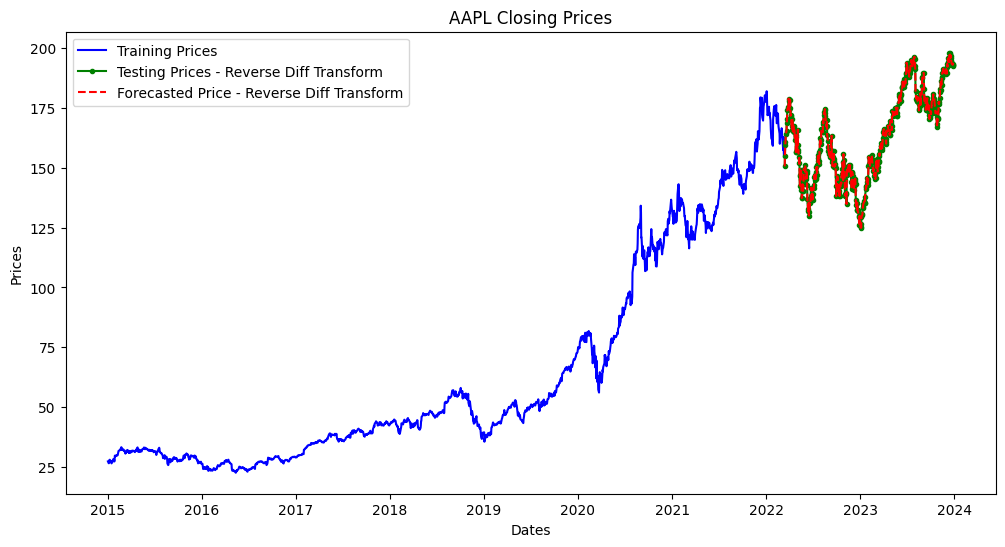

In [24]:
# plotting

plt.figure(figsize=(12, 6))
plt.title("AAPL Closing Prices")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.plot(train_series, color="blue", label='Training Prices')
plt.plot(reverse_test_diff_series, color="green", marker=".", label="Testing Prices - Reverse Diff Transform")
plt.plot(reverse_test_diff_series, color="red", linestyle="--", label="Forecasted Price - Reverse Diff Transform")
plt.legend()

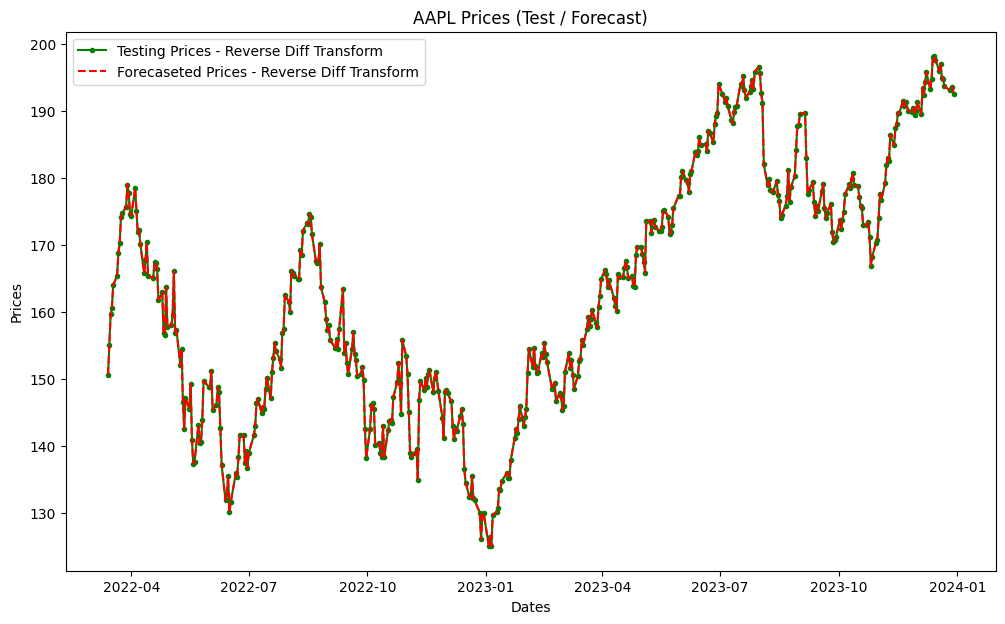

In [25]:
plt.figure(figsize=(12, 7))
plt.title('AAPL Prices (Test / Forecast)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(reverse_test_diff_series, color='green', marker='.', label='Testing Prices - Reverse Diff Transform')
plt.plot(reverse_test_diff_series, color='red', linestyle="--", label='Forecaseted Prices - Reverse Diff Transform')
plt.legend();

In [26]:
!pip install backtesting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 5.6 MB/s eta 0:00:00


In [27]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

In [28]:
# download AAPL Data

start = "2015-01-01"
end = "2024-01-01"
stock = "AAPL"

data = yf.download(stock, start=start, end=end,  auto_adjust=False, multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [29]:
class MyStrategy(Strategy):
  def init(self):
    price = self.data.Close
    self.ma1 = self.I(SMA, price, 10)
    self.ma2 = self.I(SMA, price, 20)

  def next(self):
    if crossover(self.ma1, self.ma2):
      self.buy()
    elif crossover(self.ma2, self.ma1):
      self.sell()

In [30]:
backtest = Backtest(data, MyStrategy, commission=0.002, exclusive_orders=True)
stats = backtest.run()

Backtest.run:   0%|          | 0/2244 [00:00<?, ?bar/s]

In [31]:
print(stats)

Start                     2015-01-02 00:00:00
End                       2023-12-29 00:00:00
Duration                   3283 days 00:00:00
Exposure Time [%]                     96.5106
Equity Final [$]                  18021.16803
Equity Peak [$]                   31544.91992
Commissions [$]                    5990.04499
Return [%]                           80.21168
Buy & Hold Return [%]               557.32329
Return (Ann.) [%]                     6.77524
Volatility (Ann.) [%]                29.84309
CAGR [%]                              4.62456
Sharpe Ratio                          0.22703
Sortino Ratio                         0.36523
Calmar Ratio                          0.15006
Alpha [%]                            95.69277
Beta                                 -0.02778
Max. Drawdown [%]                   -45.15035
Avg. Drawdown [%]                    -6.09445
Max. Drawdown Duration     1214 days 00:00:00
Avg. Drawdown Duration       70 days 00:00:00
# Trades                          

In [32]:
backtest.plot()

GridPlot(id='p1349', ...)